- Nilai Numerik -> imputasi dengan modus
- Nilai kategori -> imputasi dengan Ffill
- Outlier dengan -> rentang z score

In [202]:
import pandas as pd
import seaborn as sns


In [203]:
df = pd.read_csv('C:\\Users\\thebl\\Downloads\\Clone\\Intern-BCC-2024\\Dataset\\Raw\\climate_vs_flood.csv')

In [204]:
df.isnull().sum()

date               0
Tn               312
Tx               213
Tavg              46
RH_avg            52
RR              2315
ss              1259
ff_x              22
ddd_x             22
ff_avg            93
ddd_car          101
station_id         0
station_name       0
region_name        0
flood              0
dtype: int64

Imputasi nilai numerikal dengan modus

In [205]:
fitur_fitur = ['Tx', 'Tn', 'Tavg', 'RH_avg', 'ss','RR', 'ff_x', 'ff_avg', 'ddd_x']
for column in fitur_fitur:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

In [206]:
df.isnull().sum()


date              0
Tn                0
Tx                0
Tavg              0
RH_avg            0
RR                0
ss                0
ff_x              0
ddd_x             0
ff_avg            0
ddd_car         101
station_id        0
station_name      0
region_name       0
flood             0
dtype: int64

Imputasi nilai kategori dengan Ffill

In [207]:
df['ddd_car'] = df['ddd_car'].ffill()

In [208]:
df.isnull().sum()

date            0
Tn              0
Tx              0
Tavg            0
RH_avg          0
RR              0
ss              0
ff_x            0
ddd_x           0
ff_avg          0
ddd_car         0
station_id      0
station_name    0
region_name     0
flood           0
dtype: int64

In [209]:
num_col = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']
cat_col = ['ddd_car','region_name']
target = ['flood']

In [210]:
df_train = pd.concat([df[num_col], df[cat_col]], axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tn           6308 non-null   float64
 1   Tx           6308 non-null   float64
 2   Tavg         6308 non-null   float64
 3   RH_avg       6308 non-null   float64
 4   RR           6308 non-null   float64
 5   ss           6308 non-null   float64
 6   ff_x         6308 non-null   float64
 7   ddd_x        6308 non-null   float64
 8   ff_avg       6308 non-null   float64
 9   ddd_car      6308 non-null   object 
 10  region_name  6308 non-null   object 
dtypes: float64(9), object(2)
memory usage: 542.2+ KB


In [211]:
df_train_dummied = pd.get_dummies(df_train, columns=['ddd_car', 'region_name'], drop_first=True)

In [ ]:
from imblearn.over_sampling import RandomOverSampler    
X = df_train_dummied
y = df[target]

# Inisialisasi RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Melakukan oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Menampilkan jumlah sampel setelah oversampling
print("Jumlah sampel setelah oversampling:")
print(y_resampled.value_counts())

Jumlah sampel setelah oversampling:
flood
0        5832
1        5832
Name: count, dtype: int64


from sklearn.model_selection import train_test_split

# Pembagian dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

In [ ]:
from sklearn.model_selection import train_test_split

# Pembagian dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))


Jumlah data latih: 9331
Jumlah data uji: 2333


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9849978568366909


In [ ]:
from sklearn.metrics import classification_report

# Evaluasi performa model
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1205
           1       0.97      1.00      0.98      1128

    accuracy                           0.98      2333
   macro avg       0.98      0.99      0.98      2333
weighted avg       0.99      0.98      0.99      2333



In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X, y, cv=5)

# Menampilkan skor validasi silang untuk setiap fold
print("Cross-validation Scores:", cv_scores)

# Menampilkan rata-rata skor validasi silang
print("Mean CV Score:", cv_scores.mean())

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConvers

Cross-validation Scores: [0.80269414 0.92155309 0.92234548 0.92704203 0.27835052]
Mean CV Score: 0.7703970511165765


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)

In [ ]:
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

Score list: [4.46157294e+01 6.66055132e+01 1.04725197e+02 1.65647153e+03
 4.55591916e+04 1.29704225e+03 2.09071386e+00 2.99631801e+03
 1.91765904e+01 7.54292923e+01 1.71925819e+02 2.30795361e+01
 1.56649122e+01 6.15924708e+01 1.63781057e+00 1.24109503e+02
 6.69130180e+01 2.60410078e+02 2.36454302e+02 8.06771301e+01]
Feature list: Index(['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg',
       'ddd_car_E ', 'ddd_car_N ', 'ddd_car_NE', 'ddd_car_NW', 'ddd_car_S ',
       'ddd_car_SE', 'ddd_car_SW', 'ddd_car_W ', 'region_name_Jakarta Selatan',
       'region_name_Jakarta Timur', 'region_name_Jakarta Utara'],
      dtype='object')


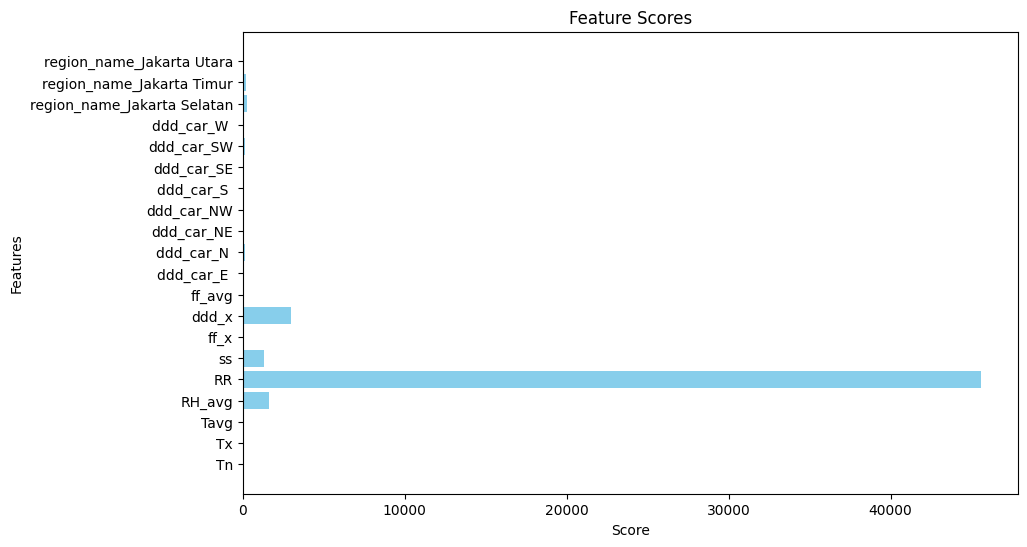

In [ ]:
import matplotlib.pyplot as plt

scores = select_feature.scores_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, scores, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature Scores')
plt.show()


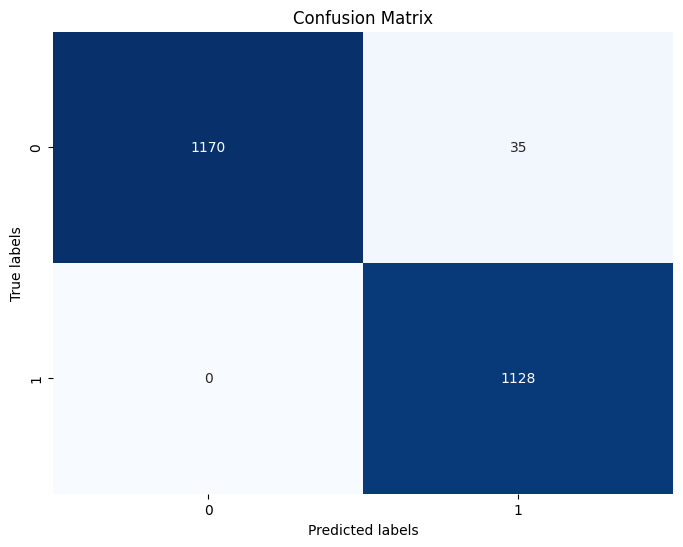

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConvers

Optimal number of features : 20
Best features : Index(['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg',
       'ddd_car_E ', 'ddd_car_N ', 'ddd_car_NE', 'ddd_car_NW', 'ddd_car_S ',
       'ddd_car_SE', 'ddd_car_SW', 'ddd_car_W ', 'region_name_Jakarta Selatan',
       'region_name_Jakarta Timur', 'region_name_Jakarta Utara'],
      dtype='object')


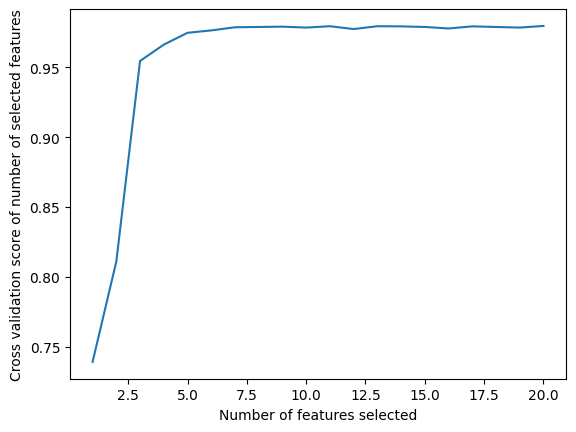

In [ ]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()